# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
#---- REQUESTS 10 SAMPLES FOR TESTING. CHANGE TO ALL CITIES FOR FINAL CODE ---

#Store the base url
url = 'https://api.openweathermap.org/data/2.5/weather'

#List to hold the response data
response_list = []

#Iterate through the list of cities
for city in cities[0:50]:
    
    #Attempt to retrieve city data
    try:
        #Build the query url
        query_url = f'{url}?q={city}&appid={weather_api_key}&units=imperial'
        
        #Print a message to show the city being processed
        print(f"Processing data for city {cities.index(city) + 1}: {city}.")
        
        #Make API request
        response = requests.get(query_url).json()

        #Create a dictionary of the desired data from the response
        response_dict = {'City': city.title(),
                         'Cloudiness': response['clouds']['all'],
                         'Country': response['sys']['country'],
                         'Date': response['dt'],
                         'Humidity': response['main']['humidity'],
                         'Lat': response['coord']['lat'],
                         'Lng': response['coord']['lon'],
                         'Max Temp': response['main']['temp_max'],
                         'Wind Speed': response['wind']['speed']
                        }
        #Add the response dictionary to the list of response data
        response_list.append(response_dict)
    
    #If the city is not found
    except:
        #Print a message and skip processing for this city
        print(f"City {cities.index(city) + 1} not found. Skipping...")

#Print a message when data retrieval is complete
print('''
-------------------------
Data retrieval complete.
-------------------------
''')

Processing data for city 1: morfelden-walldorf.
Processing data for city 2: pevek.
Processing data for city 3: jamestown.
Processing data for city 4: kavaratti.
Processing data for city 5: faanui.
Processing data for city 6: albany.
Processing data for city 7: vila velha.
Processing data for city 8: russell.
Processing data for city 9: mys shmidta.
City 9 not found. Skipping...
Processing data for city 10: airai.
Processing data for city 11: hobart.
Processing data for city 12: mount isa.
Processing data for city 13: nelson bay.
Processing data for city 14: tuktoyaktuk.
Processing data for city 15: arraial do cabo.
Processing data for city 16: moses lake.
Processing data for city 17: rikitea.
Processing data for city 18: stony plain.
Processing data for city 19: avarua.
Processing data for city 20: carnarvon.
Processing data for city 21: valparaiso.
Processing data for city 22: yellowknife.
Processing data for city 23: nikolskoye.
Processing data for city 24: westport.
Processing data 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
#Create a data frame of the retrieved city data
response_df = pd.DataFrame(response_list)

#Export the city data to a .csv file
response_df.to_csv(output_data_file)

#Display the data frame
response_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Morfelden-Walldorf,0,DE,1586385981,61,49.99,8.58,62.01,1.12
1,Pevek,100,RU,1586385925,92,69.70,170.31,0.57,7.58
2,Jamestown,1,US,1586385258,57,42.10,-79.24,57.20,12.75
3,Kavaratti,2,IN,1586385983,66,10.57,72.64,83.43,7.94
4,Faanui,84,PF,1586385534,73,-16.48,-151.75,83.70,12.71
5,Albany,75,US,1586385366,47,42.60,-73.97,57.20,10.29
6,Vila Velha,90,BR,1586385772,83,-20.33,-40.29,73.40,6.93
7,Russell,75,US,1586385985,69,32.35,-85.20,82.00,5.82
8,Airai,95,TL,1586385404,61,-8.93,125.41,67.12,0.58
9,Hobart,11,AU,1586385428,81,-42.88,147.33,50.00,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

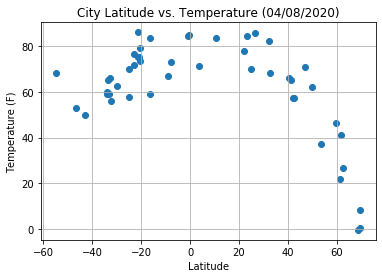

In [40]:
# --- NEED TO UPDATE DATE OF ANALYSIS FOR CHART TITLE ---
#Store the date of analysis
date = '04/08/2020'

#Create a scatter plot of latitude vs. temperature for cities in the response data frame
x_values = response_df['Lat']
y_values = response_df['Max Temp']
plt.scatter(x_values, y_values)

#Add plot titles/labels
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()

#Export the scatter plot to a .png file
plt.savefig('output_data/lat_temp.png')

plt.show()

#### Latitude vs. Humidity Plot

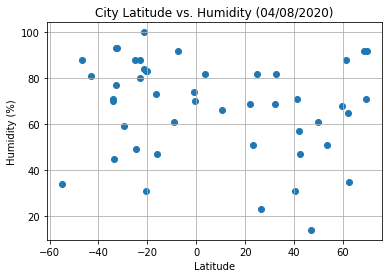

In [41]:
#Create a scatter plot of latitude vs. humidity for cities in the response data frame
x_values = response_df['Lat']
y_values = response_df['Humidity']
plt.scatter(x_values, y_values)

#Add plot titles/labels
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

#Export the scatter plot to a .png file
plt.savefig('output_data/lat_hum.png')

plt.show()

#### Latitude vs. Cloudiness Plot

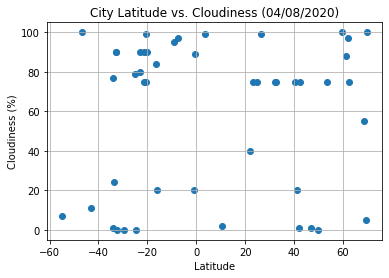

In [42]:
#Create a scatter plot of latitude vs. cloudiness for cities in the response data frame
x_values = response_df['Lat']
y_values = response_df['Cloudiness']
plt.scatter(x_values, y_values)

#Add plot titles/labels
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

#Export the scatter plot to a .png file
plt.savefig('output_data/lat_cloud.png')

plt.show()

#### Latitude vs. Wind Speed Plot

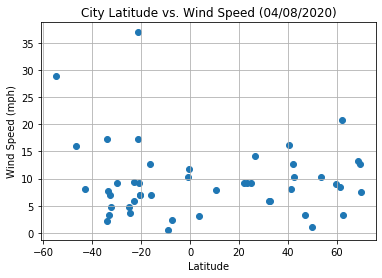

In [43]:
#Create a scatter plot of latitude vs. humidity for cities in the response data frame
x_values = response_df['Lat']
y_values = response_df['Wind Speed']
plt.scatter(x_values, y_values)

#Add plot titles/labels
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

#Export the scatter plot to a .png file
plt.savefig('output_data/lat_wind.png')

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression